In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
import embeddings

In [5]:
name_dataset = "dataset_11"
dataset_path = "datasetsv2/"
text_partition = 300
random_flag = 1
remove_punctuation = True
lemmatization_flag = True
feature_selection = 'common_words'
dimension = 2
embeddings_name ='w2v'
embedding_percentages = [index for index in range(1,21)]
number_iterations = 10
measure = "bSym2"
model_emb = "graph2vec_" + measure
name = name_dataset + '_' + str(dimension) + '_' + str(text_partition) + '_' + feature_selection +  '_' + str(number_iterations) + '_' + model_emb
output_file = 'results/' + name + '.txt'

In [6]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [7]:
#select mayor datasets
df.drop(df.loc[df['label']=="Mark Twain"].index, inplace=True)
df.drop(df.loc[df['label']=="Allan Poe"].index, inplace=True)
df.drop(df.loc[df['label']=="Joseph Conrad"].index, inplace=True)

In [8]:
df.head(5)

label                                               text  \
0    Pelham Grenville  \n\n\n\n\n\n\n\nProduced by Christine Gehring,...   
1    Pelham Grenville  \n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...   
4    Pelham Grenville  \n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...   
5      Charles Darwin  \n\n\n\n ON THE EXPRESSION OF THE EMOTIONS IN ...   
6  Arthur Conan Doyle   For this and for your help in the details all...   

                                           book  
0                               Right Ho Jeeves  
1                            Tales Of St Austin  
4                    The Man With Two Left Feet  
5  The Expression Of Emotion In Man And Animals  
6                 The Hound Of The Baskervilles

In [9]:
from utils.text_processing import get_min_len_corpus

In [10]:
min_len_book = 20111#get_min_len_corpus(list(df["text"]))

In [11]:
print("Min Length:", min_len_book)

Min Length: 20111


In [12]:
from utils.text_processing import partition_text, get_process_corpus

In [13]:
texts = list(df['text'])
len(texts)

80

In [14]:
labels = list(df['label'])
len(labels)

80

In [15]:
corpus, segmented_corpus, labels = partition_text(texts, labels, text_partition, min_len_book, random_flag)

Max partitions:  67
random indexes [4, 54, 61, 1, 26, 59, 62, 35, 20, 4, 66, 62, 41, 9, 31, 46, 5, 53, 17, 45, 48, 53, 36, 33, 58, 22, 38, 46, 17, 58, 30, 56, 48, 5, 0, 30, 17, 24, 38, 46, 30, 40, 57, 55, 60, 8, 41, 64, 20, 28, 52, 30, 4, 4, 63, 38, 9, 10, 19, 49, 47, 19, 14, 12, 56, 21, 24, 44, 55, 53, 57, 31, 35, 18, 66, 22, 15, 34, 58, 38]


# 
random indexes [4, 54, 61, 1, 26, 59, 62, 35, 20, 4, 66, 62, 41, 9, 31, 46, 5, 53, 17, 45, 48, 53, 36, 33, 58, 22, 38, 46, 17, 58, 30, 56, 48, 5, 0, 30, 17, 24, 38, 46, 30, 40, 57, 55, 60, 8, 41, 64, 20, 28, 52, 30, 4, 4, 63, 38, 9, 10, 19, 49, 47, 19, 14, 12, 56, 21, 24, 44, 55, 53, 57, 31, 35, 18, 66, 22, 15, 34, 58, 38]


In [16]:
selected_corpus, words_features, word_index, index_word = get_process_corpus(segmented_corpus, remove_punctuation_flag=remove_punctuation, lemmatization_flag=lemmatization_flag, feature_selection = feature_selection)

In [17]:
len(selected_corpus)

80

In [18]:
len(words_features)

1

In [19]:
words_features

{'the': 0}

In [20]:
len(word_index)

4506

In [21]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 8
Total entities for each class in train: 10


In [22]:
y = [dict_categories[y] for y in labels]

In [23]:
total_classes

['Charles Darwin',
 'Charles Dickens',
 'Arthur Conan Doyle',
 'Thomas Hardy',
 'George Eliot',
 'Jane Austen',
 'Pelham Grenville',
 'Daniel Defoe']

In [24]:
print('Training word embeddings ....')
objEmb = embeddings.WordEmbeddings(corpus, embeddings_name)
model = objEmb.get_embedding_model()
print('Words trained: ',len(model))
print('Word embeddings sucessfully trained')
dimensions = len(embedding_percentages) + 1

Training word embeddings ....
Training word2vec model
Words trained:  154787
Word embeddings sucessfully trained


In [25]:
def shortest_path(network, features=None):
    if features is not None:
        average_short_path = network.shortest_paths(features)
    else:
        average_short_path = network.shortest_paths()
    result = []
    for path in average_short_path:
        average = float(np.divide(np.sum(path), (len(path) - 1)))
        result.append(average)
    return result

In [26]:
import json
def graph2vec(operating_system, networks):
    input_path = "graph2vec/dataset/"+str(text_partition)+"_"+str(dimension)+"/"
    output_path = 'graph2vec/features/'
    try: 
        os.mkdir(input_path)
        os.mkdir(output_path)
    except:
        print("Existe")
    cnet = CNetwork(None, model=None, index_word=None, percentages=None, path="")
    for i, netw in enumerate(networks):
        with open((input_path+str(i)+".json"), "w") as f:
            edges = []
            v_names = netw.vs["name"]
            for edge in netw.get_edgelist():
                (u,v) = edge
                edges.append([int(v_names[u]), int(v_names[v])])
            
            if measure == "degree":
                sp1 = netw.degree()
            elif measure == "sp":
                sp1 = shortest_path(netw)
            elif measure == "cc":
                sp1 = netw.transitivity_local_undirected()
            elif measure == "btw":
                sp1 = netw.betweenness()
            elif measure == "bSym2":
                symmetries = cnet.symmetry(netw)
                sp1 = list(symmetries['bSym2'])
            features = []
            #print(sp1)
            print(len(v_names),len(sp1))
            for u,sp in enumerate(sp1):
                features.append((int(v_names[u]), sp))
            json.dump({"edges":edges, "features":features}, f)
    if operating_system == 'linux':
        #path_command = "python struc2vec/src/main.py --dimensions "+str(dimension)+" --input "+input_path+str(length_cut)+"_"+str(dimension)+"_"+str(i)+".edgelist --output "+output_path+str(length_cut)+"_"+str(dimension)+"_"+str(i)+".emb"
        path_command = 'python graph2vec/src/graph2vec.py --input-path ' + input_path + ' --output-path ' + output_path+str(text_partition)+'_'+str(dimension)+'.csv' + ' --dimensions ' + str(dimension)
        os.system(path_command)
        print("graph2vec", str(i))

In [27]:
def read_graph2vec(output_path, networks):
    all_network_features = [[] for _ in range(len(networks))]
    with open(output_path+str(text_partition)+"_"+str(dimension)+".csv", "r") as f:
        lines = f.readlines()
        for l in lines[1:]:
            row = l.strip().split(",")
            id_graph = row[0]
            print("id graph", id_graph)
            network_features = np.array([float(v) for v in row[1:]])
            print(str(id_graph), "len",len(network_features))
            all_network_features[int(id_graph)] = network_features
    return np.array(all_network_features)

In [28]:
def get_graph2vec_features(sequences, index_word):
    container_features = [[] for _ in range(dimensions)]
    for text in sequences:
        obj = CNetwork(text, model=model, index_word=index_word, percentages=embedding_percentages, path="")
        networks = obj.create_networks()
        for j in range(dimensions):
            container_features[j].append(networks[j])
    for j,nets in enumerate(container_features):
        #nets.append(network)
        graph2vec("linux", nets)
        X = read_graph2vec('graph2vec/features/', nets)
        container_features[j] = X
    #return X
    return np.array(container_features)

In [29]:
container_features = get_graph2vec_features(selected_corpus, index_word)

Nodes: 164 - Edges: 235
Testing available edges: 13366 13131
Num edges in networks: [235, 238, 240, 243, 245, 247, 250, 252, 254, 257, 259, 261, 264, 266, 268, 271, 273, 275, 278, 280, 283]
Nodes: 162 - Edges: 245
Testing available edges: 13041 12796
Num edges in networks: [245, 248, 250, 253, 255, 258, 260, 263, 265, 268, 270, 272, 275, 277, 280, 282, 285, 287, 290, 292, 295]
Nodes: 150 - Edges: 230
Testing available edges: 11175 10945
Num edges in networks: [230, 233, 235, 237, 240, 242, 244, 247, 249, 251, 254, 256, 258, 260, 263, 265, 267, 270, 272, 274, 277]
Nodes: 170 - Edges: 243
Testing available edges: 14365 14122
Num edges in networks: [243, 246, 248, 251, 253, 256, 258, 261, 263, 265, 268, 270, 273, 275, 278, 280, 282, 285, 287, 290, 292]
Nodes: 161 - Edges: 253
Testing available edges: 12880 12627
Num edges in networks: [253, 256, 259, 261, 264, 266, 269, 271, 274, 276, 279, 281, 284, 286, 289, 291, 294, 297, 299, 302, 304]
Nodes: 156 - Edges: 248
Testing available edges: 1

Num edges in networks: [234, 237, 239, 242, 244, 246, 249, 251, 253, 256, 258, 260, 263, 265, 267, 270, 272, 274, 277, 279, 281]
Nodes: 156 - Edges: 251
Testing available edges: 12090 11839
not found discus
Num edges in networks: [251, 254, 257, 259, 262, 264, 267, 269, 272, 274, 277, 279, 282, 284, 287, 289, 292, 294, 297, 299, 302]
Nodes: 144 - Edges: 240
Testing available edges: 10296 10056
Num edges in networks: [240, 243, 245, 248, 250, 253, 255, 257, 260, 262, 265, 267, 269, 272, 274, 277, 279, 281, 284, 286, 289]
Nodes: 130 - Edges: 244
Testing available edges: 8385 8141
Num edges in networks: [244, 247, 249, 252, 254, 257, 259, 262, 264, 266, 269, 271, 274, 276, 279, 281, 284, 286, 288, 291, 293]
Nodes: 170 - Edges: 258
Testing available edges: 14365 14107
not found alto
Num edges in networks: [258, 261, 264, 266, 269, 271, 274, 277, 279, 282, 284, 287, 289, 292, 295, 297, 300, 302, 305, 308, 310]
Nodes: 163 - Edges: 238
Testing available edges: 13203 12965
Num edges in network

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


162 162
150 150
170 170
161 161
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


190 190
156 156
163 163
162 162
159 159


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


138 138
178 178
176 176


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150


150 150
158 158
150 150
126 126


# Progress:  158/158
# Progress:  150/150
# Progress:  126/126


# Progress:  150/150
# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


150 150
144 144
166 166
126 126
166 166


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157
# Progress:  150/150


154 154
155 155
157 157
150 150


# Progress:  140/140
# Progress:  139/139
# Progress:  144/144
# Progress:  168/168


140 140
139 139
144 144
168 168


# Progress:  162/162
# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


162 162
142 142
142 142
158 158


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166
# Progress:    0/171

175 175
153 153
166 166
166 166
171 171


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164
# Progress: 

158 158
123 123
164 164
184 184


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


148 148
152 152
166 166
168 168


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


160 160
133 133
149 149
158 158


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165


157 157
157 157
153 153
165 165
155 155


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


156 156
185 185
152 152
173 173


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156


152 152
166 166
132 132
156 156
144 144


# Progress:  144/144
# Progress:  130/130
# Progress:  170/170
# Progress:    0/163

130 130
170 170
163 163
173 173


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152


167 167
152 152
134 134
169 169


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161


159 159
161 161
153 153
139 139
158 158


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 106.80it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


150 150
170 170
161 161
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:    0/163

190 190
156 156
163 163
162 162


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


159 159
138 138
178 178
176 176


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


150 150
158 158
150 150
126 126


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


150 150
144 144
166 166


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126


126 126
166 166
154 154


# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139


155 155
157 157
150 150
140 140
139 139


# Progress:  144/144
# Progress:  168/168
# Progress:  162/162
# Progress:  142/142


144 144
168 168
162 162
142 142


# Progress:  142/142
# Progress:  158/158
# Progress:  175/175
# Progress:  153/153


142 142
158 158
175 175
153 153


# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:  158/158


166 166
166 166
171 171
158 158


# Progress:  123/123
# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


123 123
164 164
184 184
148 148


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  160/160


152 152
166 166
168 168
160 160


# Progress:  133/133
# Progress:  149/149
# Progress:  158/158
# Progress:  157/157
# Progress:  129/157

133 133
149 149
158 158
157 157
157 157


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155
# Progress:  156/156


153 153
165 165
155 155
156 156
185 185


# Progress:  185/185
# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  161/166

152 152
173 173
152 152
166 166
132 132


# Progress:  166/166
# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


156 156
144 144
130 130
170 170
163 163


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152


173 173
167 167
152 152
134 134
169 169


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161


159 159
161 161
153 153
139 139


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158


158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 108.31it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


150 150
170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162
159 159
138 138


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


178 178
176 176
150 150
158 158


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158
# Progress:  150/150


150 150
126 126
150 150
144 144


# Progress:  126/126
# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


166 166
126 126
166 166
154 154


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


155 155
157 157
150 150


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


140 140
139 139
144 144
168 168


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


162 162
142 142
142 142
158 158


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


175 175
153 153
166 166
166 166


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


171 171
158 158
123 123
164 164


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


184 184
148 148
152 152
166 166


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


168 168
160 160
133 133
149 149


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153


158 158
157 157
157 157
153 153


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185


165 165
155 155
156 156
185 185


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


152 152
173 173
152 152
166 166
132 132


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170
# Progress:  163/163


156 156
144 144
130 130
170 170
163 163


# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:  134/134
# Progress:  169/169


173 173
167 167
152 152
134 134
169 169


# Progress:  159/159
# Progress:  161/161
# Progress:  153/153
# Progress:  139/139


159 159
161 161
153 153
139 139


# Progress:  158/158
# Progress:  164/164


158 158
164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 108.36it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:  129/161

170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162
159 159
138 138


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:    0/158

178 178
176 176
150 150
158 158


# Progress:  158/158
# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


150 150
126 126
150 150
144 144


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


166 166
126 126
166 166
154 154


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157
# Progress:  150/150


155 155
157 157
150 150
140 140


# Progress:  140/140
# Progress:  139/139
# Progress:  144/144
# Progress:  168/168


139 139
144 144
168 168
162 162


# Progress:  162/162
# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


142 142
142 142
158 158
175 175


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


153 153
166 166
166 166
171 171
158 158


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


123 123
164 164
184 184
148 148


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


152 152
166 166
168 168
160 160


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


133 133
149 149
158 158
157 157


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153


157 157
153 153
165 165
155 155


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  171/185

156 156
185 185
152 152


# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


173 173
152 152
166 166


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


132 132
156 156
144 144
130 130


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


170 170
163 163
173 173
167 167


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152


152 152
134 134
169 169
159 159
161 161


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  153/153


153 153
139 139
158 158
164 164


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 103.13it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162
159 159


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


138 138
178 178
176 176
150 150


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


158 158
150 150
126 126
150 150


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


144 144
166 166
126 126
166 166


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


154 154
155 155
157 157
150 150


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


140 140
139 139
144 144
168 168


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


162 162
142 142
142 142
158 158
175 175


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175


# Progress:  153/153
# Progress:  166/166
# Progress:  166/166
# Progress:  171/171


153 153
166 166
166 166
171 171


# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


158 158
123 123
164 164


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


184 184
148 148
152 152
166 166


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


168 168
160 160
133 133
149 149


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  164/165

158 158
157 157
157 157
153 153
165 165


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  147/152

155 155
156 156
185 185
152 152
173 173


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


152 152
166 166
132 132
156 156


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:    0/130

144 144
130 130
170 170


# Progress:  130/130
# Progress:  170/170
# Progress:  163/163
# Progress:  133/173

163 163
173 173
167 167
152 152


# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:  134/134


134 134
169 169
159 159
161 161


# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  153/153


153 153
139 139
158 158
164 164


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 106.98it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


150 150
170 170
161 161
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


190 190
156 156
163 163
162 162


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


159 159
138 138
178 178
176 176


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


150 150
158 158
150 150
126 126


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:    0/144

150 150
144 144
166 166
126 126


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


166 166
154 154
155 155
157 157
150 150


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


140 140
139 139
144 144
168 168
162 162


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175


142 142
142 142
158 158
175 175


# Progress:  153/153
# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:  158/158


153 153
166 166
166 166
171 171
158 158


# Progress:  123/123
# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


123 123
164 164
184 184
148 148


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  160/160


152 152
166 166
168 168
160 160


# Progress:  133/133
# Progress:  149/149
# Progress:  158/158
# Progress:  157/157


133 133
149 149
158 158
157 157


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155
# Progress:  156/156


157 157
153 153
165 165
155 155
156 156


# Progress:  185/185
# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


185 185
152 152
173 173
152 152
166 166


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


132 132
156 156
144 144
130 130


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


170 170
163 163
173 173
167 167


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159


152 152
134 134
169 169
159 159


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158

161 161
153 153
139 139
158 158



# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 104.75it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150


150 150
170 170
161 161
156 156


# Progress:  170/170
# Progress:  161/161
# Progress:  156/156
# Progress:  190/190


190 190
156 156
163 163
162 162


# Progress:  156/156
# Progress:  163/163
# Progress:  162/162
# Progress:  159/159


159 159
138 138
178 178
176 176


# Progress:  138/138
# Progress:  178/178
# Progress:  176/176
# Progress:  150/150


150 150
158 158
150 150
126 126


# Progress:  158/158
# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


150 150
144 144
166 166
126 126


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


166 166
154 154
155 155
157 157


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157


# Progress:  150/150
# Progress:  140/140
# Progress:  139/139
# Progress:  144/144


150 150
140 140
139 139
144 144


# Progress:  168/168
# Progress:  162/162
# Progress:  142/142
# Progress:  142/142


168 168
162 162
142 142
142 142


# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:  166/166


158 158
175 175
153 153
166 166


# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:  123/123


166 166
171 171
158 158
123 123


# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


164 164
184 184
148 148


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  160/160


152 152
166 166
168 168
160 160


# Progress:  133/133
# Progress:  149/149
# Progress:  158/158
# Progress:  157/157


133 133
149 149
158 158
157 157


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155


157 157
153 153
165 165
155 155


# Progress:  156/156
# Progress:  185/185
# Progress:  152/152


156 156
185 185
152 152


# Progress:  173/173
# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


173 173
152 152
166 166
132 132
156 156


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


144 144
130 130
170 170
163 163


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:    1/152

173 173
167 167
152 152
134 134


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159


169 169
159 159
161 161


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158


153 153
139 139
158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 106.21it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163


163 163
162 162
159 159
138 138


# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


178 178
176 176
150 150
158 158


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158
# Progress:  150/150


150 150
126 126
150 150
144 144


# Progress:  126/126
# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


166 166
126 126
166 166
154 154


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150


155 155
157 157
150 150


# Progress:  140/140
# Progress:  139/139
# Progress:  144/144


140 140
139 139
144 144


# Progress:  168/168
# Progress:  162/162
# Progress:  142/142
# Progress:  142/142


168 168
162 162
142 142
142 142


# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:    0/166

158 158
175 175
153 153
166 166


# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


166 166
171 171
158 158
123 123
164 164


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166
# Progress:  168/168


184 184
148 148
152 152
166 166
168 168


# Progress:  160/160
# Progress:  133/133
# Progress:  149/149
# Progress:  158/158
# Progress:  157/157


160 160
133 133
149 149
158 158
157 157


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155
# Progress:  156/156


157 157
153 153
165 165
155 155
156 156


# Progress:  185/185
# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


185 185
152 152
173 173
152 152
166 166


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


132 132
156 156
144 144
130 130
170 170


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:    0/134

163 163
173 173
167 167
152 152
134 134


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  148/153

169 169
159 159
161 161
153 153
139 139


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


158 158
164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 102.17it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150


150 150
170 170
161 161
156 156


# Progress:  170/170
# Progress:  161/161
# Progress:  156/156
# Progress:  190/190


190 190
156 156
163 163
162 162


# Progress:  156/156
# Progress:  163/163
# Progress:  162/162
# Progress:  159/159


159 159
138 138
178 178
176 176
150 150


# Progress:  138/138
# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


158 158
150 150
126 126
150 150


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


144 144
166 166
126 126
166 166


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


154 154
155 155
157 157
150 150
140 140


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


139 139
144 144
168 168
162 162


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175
# Progress:  153/153


142 142
142 142
158 158
175 175
153 153


# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:   21/123

166 166
166 166
171 171
158 158
123 123


# Progress:  123/123
# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


164 164
184 184
148 148
152 152


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168


166 166
168 168
160 160


# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


133 133
149 149
158 158
157 157


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153


157 157
153 153
165 165
155 155
156 156


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185


185 185
152 152
173 173
152 152


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


166 166
132 132
156 156
144 144


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


130 130
170 170
163 163
173 173


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


167 167
152 152
134 134
169 169


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159


159 159
161 161
153 153
139 139
158 158


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 105.68it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159


159 159
138 138
178 178
176 176


# Progress:  138/138
# Progress:  178/178
# Progress:  176/176
# Progress:  150/150


150 150
158 158
150 150
126 126
150 150


# Progress:  158/158
# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


144 144
166 166
126 126
166 166
154 154


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


155 155
157 157
150 150
140 140
139 139


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139
# Progress:  144/144


144 144
168 168
162 162
142 142


# Progress:  168/168
# Progress:  162/162
# Progress:  142/142
# Progress:  142/142


142 142
158 158
175 175
153 153


# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:  166/166


166 166
166 166
171 171
158 158


# Progress:  166/166
# Progress:  171/171
# Progress:  158/158


# Progress:  123/123
# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


123 123
164 164
184 184
148 148


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  150/160

152 152
166 166
168 168
160 160


# Progress:  160/160
# Progress:  133/133
# Progress:  149/149
# Progress:  158/158


133 133
149 149
158 158
157 157


# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165


157 157
153 153
165 165
155 155


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  152/152


156 156
185 185
152 152
173 173


# Progress:  173/173
# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


152 152
166 166
132 132
156 156


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


144 144
130 130
170 170
163 163
173 173


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152


167 167
152 152
134 134
169 169


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161


159 159
161 161
153 153


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:    0/164

139 139
158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 99.31it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150


150 150
170 170
161 161
156 156


# Progress:  170/170
# Progress:  161/161
# Progress:  156/156
# Progress:  190/190


190 190
156 156
163 163


# Progress:  156/156
# Progress:  163/163
# Progress:  162/162


162 162
159 159
138 138
178 178


# Progress:  159/159
# Progress:  138/138
# Progress:  178/178
# Progress:  176/176


176 176
150 150
158 158
150 150


# Progress:  150/150
# Progress:  158/158
# Progress:  150/150
# Progress:  126/126


126 126
150 150
144 144


# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


166 166
126 126
166 166


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


154 154
155 155
157 157
150 150


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


140 140
139 139
144 144
168 168


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168


# Progress:  162/162
# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


162 162
142 142
142 142
158 158


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


175 175
153 153
166 166
166 166


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  123/164

171 171
158 158
123 123
164 164


# Progress:  164/164
# Progress:  184/184
# Progress:  148/148
# Progress:  152/152


184 184
148 148
152 152
166 166


# Progress:  166/166
# Progress:  168/168
# Progress:  160/160
# Progress:  133/133


168 168
160 160
133 133
149 149


# Progress:  149/149
# Progress:  158/158
# Progress:  157/157
# Progress:  157/157


158 158
157 157
157 157
153 153


# Progress:  153/153
# Progress:  165/165
# Progress:  155/155
# Progress:  156/156


165 165
155 155
156 156
185 185


# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


152 152
173 173
152 152
166 166


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156


132 132
156 156
144 144
130 130


# Progress:  144/144
# Progress:  130/130
# Progress:  170/170
# Progress:  163/163


170 170
163 163
173 173
167 167


# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:  134/134


152 152
134 134
169 169
159 159
161 161


# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  153/153
# Progress:  139/139


153 153
139 139
158 158
164 164


# Progress:  158/158
# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 105.54it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162
159 159


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


138 138
178 178
176 176
150 150


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


158 158
150 150
126 126
150 150


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


144 144
166 166
126 126
166 166


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:    0/155

154 154
155 155
157 157
150 150


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


140 140
139 139
144 144
168 168


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


162 162
142 142
142 142
158 158


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175


175 175
153 153
166 166
166 166


# Progress:  153/153
# Progress:  166/166
# Progress:  166/166
# Progress:  171/171


171 171
158 158
123 123
164 164


# Progress:  158/158
# Progress:  123/123
# Progress:  164/164
# Progress:  184/184


184 184
148 148
152 152
166 166


# Progress:  148/148
# Progress:  152/152
# Progress:  166/166
# Progress:  168/168


168 168
160 160
133 133
149 149


# Progress:  160/160
# Progress:  133/133
# Progress:  149/149
# Progress:  158/158


158 158
157 157
157 157
153 153


# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165


165 165
155 155
156 156
185 185
152 152


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


173 173
152 152
166 166
132 132
156 156


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156
# Progress:  144/144


144 144
130 130
170 170
163 163


# Progress:  130/130
# Progress:  170/170
# Progress:  163/163
# Progress:  173/173


173 173
167 167
152 152
134 134
169 169


# Progress:  167/167
# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159


159 159
161 161
153 153
139 139


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158


158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 104.79it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150


150 150
170 170
161 161
156 156


# Progress:  170/170
# Progress:  161/161
# Progress:  156/156
# Progress:  190/190


190 190
156 156
163 163
162 162


# Progress:  156/156
# Progress:  163/163
# Progress:  162/162


# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


159 159
138 138
178 178


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


176 176
150 150
158 158


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


150 150
126 126
150 150
144 144


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


166 166
126 126
166 166
154 154
155 155


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139
# Progress:  144/144


157 157
150 150
140 140
139 139
144 144


# Progress:  168/168
# Progress:  162/162
# Progress:  142/142
# Progress:  142/142


168 168
162 162
142 142
142 142


# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:   58/166

158 158
175 175
153 153
166 166


# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:    0/158

166 166
171 171
158 158
123 123


# Progress:  158/158
# Progress:  123/123
# Progress:  164/164
# Progress:  184/184


164 164
184 184
148 148
152 152


# Progress:  148/148
# Progress:  152/152
# Progress:  166/166
# Progress:  168/168


166 166
168 168
160 160
133 133
149 149


# Progress:  160/160
# Progress:  133/133
# Progress:  149/149
# Progress:  158/158


158 158
157 157
157 157
153 153


# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165


165 165
155 155
156 156
185 185
152 152


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


173 173
152 152
166 166
132 132
156 156


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156
# Progress:  144/144


144 144
130 130
170 170
163 163
173 173


# Progress:  130/130
# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


167 167
152 152
134 134
169 169
159 159


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161


161 161
153 153
139 139
158 158
164 164


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:01<00:00, 72.99it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:  161/161


170 170
161 161
156 156
190 190
156 156


# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163


163 163
162 162
159 159
138 138


# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


178 178
176 176
150 150
158 158


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


150 150
126 126
150 150
144 144


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


166 166
126 126
166 166
154 154


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140


155 155
157 157
150 150
140 140
139 139


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


144 144
168 168
162 162
142 142
142 142


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175
# Progress:  153/153


158 158
175 175
153 153
166 166


# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:  158/158


166 166
171 171
158 158
123 123


# Progress:  123/123
# Progress:  164/164
# Progress:  184/184
# Progress:  148/148


164 164
184 184
148 148
152 152


# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  160/160
# Progress:   22/133

166 166
168 168
160 160
133 133
149 149


# Progress:  133/133
# Progress:  149/149
# Progress:  158/158
# Progress:  157/157


158 158
157 157
157 157
153 153


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155


165 165
155 155
156 156
185 185


# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


152 152
173 173
152 152
166 166
132 132


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156
# Progress:  144/144


156 156
144 144
130 130
170 170
163 163


# Progress:  130/130
# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


173 173
167 167
152 152
134 134
169 169


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161


159 159
161 161
153 153
139 139
158 158


# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 102.02it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:  161/161


170 170
161 161
156 156
190 190
156 156


# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163
# Progress:  162/162


163 163
162 162
159 159
138 138
178 178


# Progress:  159/159
# Progress:  138/138
# Progress:  178/178
# Progress:  176/176
# Progress:  150/150


176 176
150 150
158 158
150 150


# Progress:  158/158
# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


126 126
150 150
144 144
166 166


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


126 126
166 166
154 154
155 155
157 157


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139


150 150
140 140
139 139
144 144
168 168


# Progress:  144/144
# Progress:  168/168
# Progress:  162/162
# Progress:  142/142


162 162
142 142
142 142
158 158


# Progress:  142/142
# Progress:  158/158
# Progress:  175/175
# Progress:  153/153


175 175
153 153
166 166
166 166


# Progress:  166/166
# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:  123/123


171 171
158 158
123 123
164 164
184 184


# Progress:  164/164
# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


148 148
152 152
166 166
168 168


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:    2/149

160 160
133 133
149 149
158 158


# Progress:  149/149
# Progress:  158/158
# Progress:  157/157
# Progress:  129/157

157 157
157 157
153 153
165 165


# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:  155/155


155 155
156 156
185 185
152 152


# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


173 173
152 152
166 166
132 132


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


156 156
144 144
130 130


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


170 170
163 163
173 173
167 167


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:   44/161

152 152
134 134
169 169
159 159
161 161


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158


153 153
139 139
158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 101.29it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:  161/161


170 170
161 161
156 156
190 190
156 156


# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163
# Progress:  162/162


163 163
162 162
159 159
138 138
178 178


# Progress:  159/159
# Progress:  138/138
# Progress:  178/178
# Progress:  176/176


176 176
150 150
158 158
150 150
126 126


# Progress:  150/150
# Progress:  158/158
# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


150 150
144 144
166 166
126 126


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157
# Progress:  150/150


166 166
154 154
155 155
157 157
150 150


# Progress:  140/140
# Progress:  139/139
# Progress:  144/144
# Progress:  168/168


140 140
139 139
144 144
168 168


# Progress:  162/162
# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


162 162
142 142
142 142
158 158


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


175 175
153 153
166 166
166 166


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


171 171
158 158
123 123
164 164


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


184 184
148 148
152 152
166 166


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


168 168
160 160
133 133
149 149


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153


158 158
157 157
157 157
153 153


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185


165 165
155 155
156 156
185 185


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166
# Progress:    0/132

152 152
173 173
152 152
166 166
132 132


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


156 156
144 144
130 130
170 170
163 163


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:    0/134

173 173
167 167
152 152
134 134


# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  153/153


169 169
159 159
161 161
153 153
139 139


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


158 158
164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 103.37it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


156 156
163 163
162 162
159 159


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


138 138
178 178
176 176
150 150


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


158 158
150 150
126 126


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150


150 150
144 144
166 166
126 126


# Progress:  144/144
# Progress:  166/166
# Progress:  126/126
# Progress:  166/166


166 166
154 154
155 155
157 157


# Progress:  154/154
# Progress:  155/155
# Progress:  157/157


# Progress:  150/150
# Progress:  140/140
# Progress:  139/139


150 150
140 140
139 139


# Progress:  144/144
# Progress:  168/168
# Progress:  162/162
# Progress:  125/142

144 144
168 168
162 162
142 142


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


142 142
158 158
175 175
153 153


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


166 166
166 166
171 171
158 158


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


123 123
164 164
184 184
148 148


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


152 152
166 166
168 168
160 160


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


133 133
149 149
158 158
157 157
157 157


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:    2/165

153 153
165 165
155 155
156 156


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185


185 185
152 152
173 173
152 152


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


166 166
132 132
156 156
144 144
130 130


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


170 170
163 163
173 173
167 167
152 152


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:  134/134


134 134
169 169
159 159
161 161
153 153


# Progress:  169/169
# Progress:  159/159
# Progress:  161/161
# Progress:  153/153


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


139 139
158 158
164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 89.87it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:    0/161

170 170
161 161
156 156
190 190
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138


163 163
162 162
159 159
138 138


# Progress:  178/178
# Progress:  176/176
# Progress:  150/150
# Progress:  158/158


178 178
176 176
150 150
158 158
150 150


# Progress:  150/150
# Progress:  126/126
# Progress:  150/150
# Progress:  144/144


126 126
150 150
144 144
166 166
126 126


# Progress:  166/166
# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


166 166
154 154
155 155
157 157


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150


150 150
140 140
139 139
144 144


# Progress:  140/140
# Progress:  139/139
# Progress:  144/144
# Progress:  168/168


168 168
162 162
142 142
142 142


# Progress:  162/162
# Progress:  142/142
# Progress:  142/142
# Progress:  158/158


158 158
175 175
153 153
166 166


# Progress:  175/175
# Progress:  153/153
# Progress:  166/166
# Progress:  166/166


166 166
171 171
158 158
123 123
164 164


# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  164/164


# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


184 184
148 148
152 152
166 166


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149
# Progress:  158/158


168 168
160 160
133 133
149 149
158 158


# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165
# Progress:    0/155

157 157
157 157
153 153
165 165
155 155


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:  152/152
# Progress:  173/173


156 156
185 185
152 152
173 173
152 152


# Progress:  152/152
# Progress:  166/166
# Progress:  132/132
# Progress:  156/156


166 166
132 132
156 156
144 144


# Progress:  144/144
# Progress:  130/130
# Progress:  170/170
# Progress:  163/163


130 130
170 170
163 163
173 173
167 167


# Progress:  173/173
# Progress:  167/167
# Progress:  152/152
# Progress:  134/134
# Progress:  169/169


152 152
134 134
169 169
159 159


# Progress:  159/159
# Progress:  161/161
# Progress:  153/153
# Progress:    0/139

161 161
153 153
139 139
158 158


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 100.08it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163


163 163
162 162
159 159
138 138


# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


178 178
176 176
150 150
158 158


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158
# Progress:  150/150


150 150
126 126
150 150
144 144


# Progress:  126/126
# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


166 166
126 126
166 166
154 154


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


155 155
157 157
150 150
140 140
139 139


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139
# Progress:  144/144


144 144
168 168
162 162
142 142


# Progress:  168/168
# Progress:  162/162
# Progress:  142/142
# Progress:  142/142


# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:  166/166


142 142
158 158
175 175
153 153
166 166


# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:  123/123


166 166
171 171
158 158
123 123


# Progress:  164/164
# Progress:  184/184
# Progress:  148/148
# Progress:  152/152
# Progress:  166/166


164 164
184 184
148 148
152 152
166 166


# Progress:  168/168
# Progress:  160/160
# Progress:  133/133
# Progress:  149/149


168 168
160 160
133 133
149 149
158 158


# Progress:  158/158
# Progress:  157/157
# Progress:  157/157
# Progress:  153/153


157 157
157 157
153 153
165 165


# Progress:  165/165
# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:    0/152

155 155
156 156
185 185
152 152


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


173 173
152 152
166 166
132 132


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


156 156
144 144
130 130
170 170


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


163 163
173 173
167 167
152 152
134 134


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169
# Progress:  159/159
# Progress:    0/161

169 169
159 159
161 161
153 153


# Progress:  161/161
# Progress:  153/153
# Progress:  139/139
# Progress:  158/158
# Progress:    1/164

139 139
158 158
164 164


# Progress:  164/164



Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 91.84it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170
# Progress:    0/161

170 170
161 161
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156
# Progress:  163/163


190 190
156 156
163 163
162 162


# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


159 159
138 138
178 178
176 176
150 150


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158
# Progress:  150/150


158 158
150 150
126 126
150 150


# Progress:  126/126
# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


144 144
166 166
126 126
166 166


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154
# Progress:  155/155


154 154
155 155
157 157
150 150


# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  139/139


140 140
139 139
144 144
168 168


# Progress:  144/144
# Progress:  168/168
# Progress:  162/162
# Progress:  142/142


162 162
142 142
142 142
158 158
175 175


# Progress:  142/142
# Progress:  158/158
# Progress:  175/175
# Progress:  153/153
# Progress:  166/166


153 153
166 166
166 166
171 171


# Progress:  166/166
# Progress:  171/171
# Progress:  158/158
# Progress:  123/123
# Progress:  122/164

158 158
123 123
164 164
184 184


# Progress:  164/164
# Progress:  184/184
# Progress:  148/148
# Progress:  152/152


148 148
152 152
166 166
168 168


# Progress:  166/166
# Progress:  168/168
# Progress:  160/160
# Progress:  133/133


160 160
133 133
149 149
158 158


# Progress:  149/149
# Progress:  158/158
# Progress:  157/157
# Progress:  157/157


157 157
157 157
153 153


# Progress:  153/153
# Progress:  165/165
# Progress:  155/155


165 165
155 155
156 156
185 185


# Progress:  156/156
# Progress:  185/185
# Progress:  152/152


152 152
173 173
152 152
166 166


# Progress:  173/173
# Progress:  152/152
# Progress:  166/166
# Progress:  132/132


132 132
156 156
144 144
130 130


# Progress:  156/156
# Progress:  144/144
# Progress:  130/130
# Progress:  170/170


170 170
163 163
173 173
167 167


# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169


152 152
134 134
169 169


# Progress:  159/159
# Progress:  161/161
# Progress:  153/153
# Progress:    1/139

159 159
161 161
153 153
139 139


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


158 158
164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 105.75it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

# Progress:  164/164
# Progress:  162/162
# Progress:  150/150
# Progress:  170/170


170 170
161 161
156 156
190 190
156 156


# Progress:  161/161
# Progress:  156/156
# Progress:  190/190
# Progress:  156/156


# Progress:  163/163
# Progress:  162/162
# Progress:  159/159
# Progress:  138/138
# Progress:  178/178


163 163
162 162
159 159
138 138
178 178


# Progress:  176/176
# Progress:  150/150
# Progress:  158/158
# Progress:  150/150


176 176
150 150
158 158
150 150


# Progress:  126/126
# Progress:  150/150
# Progress:  144/144
# Progress:  166/166


126 126
150 150
144 144
166 166


# Progress:  126/126
# Progress:  166/166
# Progress:  154/154


126 126
166 166
154 154


# Progress:  155/155
# Progress:  157/157
# Progress:  150/150
# Progress:  140/140
# Progress:  122/139

155 155
157 157
150 150
140 140
139 139


# Progress:  139/139
# Progress:  144/144
# Progress:  168/168
# Progress:  162/162


144 144
168 168
162 162
142 142


# Progress:  142/142
# Progress:  142/142
# Progress:  158/158
# Progress:  175/175


142 142
158 158
175 175
153 153


# Progress:  153/153
# Progress:  166/166
# Progress:  166/166
# Progress:  171/171


166 166
166 166
171 171
158 158


# Progress:  158/158
# Progress:  123/123
# Progress:  164/164
# Progress:  184/184


123 123
164 164
184 184
148 148


# Progress:  148/148
# Progress:  152/152
# Progress:  166/166
# Progress:  168/168
# Progress:  160/160


152 152
166 166
168 168
160 160


# Progress:  133/133
# Progress:  149/149
# Progress:  158/158


133 133
149 149
158 158


# Progress:  157/157
# Progress:  157/157
# Progress:  153/153
# Progress:  165/165


157 157
157 157
153 153
165 165


# Progress:  155/155
# Progress:  156/156
# Progress:  185/185
# Progress:    0/152

155 155
156 156
185 185
152 152


# Progress:  152/152
# Progress:  173/173
# Progress:  152/152
# Progress:  166/166


173 173
152 152
166 166
132 132


# Progress:  132/132
# Progress:  156/156
# Progress:  144/144
# Progress:  130/130


156 156
144 144
130 130
170 170


# Progress:  170/170
# Progress:  163/163
# Progress:  173/173
# Progress:  167/167


163 163
173 173
167 167
152 152


# Progress:  152/152
# Progress:  134/134
# Progress:  169/169


134 134
169 169
159 159


# Progress:  159/159
# Progress:  161/161
# Progress:  153/153
# Progress:  108/139

161 161
153 153
139 139
158 158


# Progress:  139/139
# Progress:  158/158
# Progress:  164/164


164 164

Feature extraction started.



100%|██████████| 80/80 [00:00<00:00, 102.25it/s]



Optimization started.

graph2vec 79
id graph 0
0 len 2
id graph 1
1 len 2
id graph 2
2 len 2
id graph 3
3 len 2
id graph 4
4 len 2
id graph 5
5 len 2
id graph 6
6 len 2
id graph 7
7 len 2
id graph 8
8 len 2
id graph 9
9 len 2
id graph 10
10 len 2
id graph 11
11 len 2
id graph 12
12 len 2
id graph 13
13 len 2
id graph 14
14 len 2
id graph 15
15 len 2
id graph 16
16 len 2
id graph 17
17 len 2
id graph 18
18 len 2
id graph 19
19 len 2
id graph 20
20 len 2
id graph 21
21 len 2
id graph 22
22 len 2
id graph 23
23 len 2
id graph 24
24 len 2
id graph 25
25 len 2
id graph 26
26 len 2
id graph 27
27 len 2
id graph 28
28 len 2
id graph 29
29 len 2
id graph 30
30 len 2
id graph 31
31 len 2
id graph 32
32 len 2
id graph 33
33 len 2
id graph 34
34 len 2
id graph 35
35 len 2
id graph 36
36 len 2
id graph 37
37 len 2
id graph 38
38 len 2
id graph 39
39 len 2
id graph 40
40 len 2
id graph 41
41 len 2
id graph 42
42 len 2
id graph 43
43 len 2
id graph 44
44 len 2
id graph 45
45 len 2
id graph 46
46 le

In [30]:
print("Lenght of features:", container_features[0].shape)

Lenght of features: (80, 2)


# Visualize

In [31]:
from utils.visualize_tsne import visualize_tsne

/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


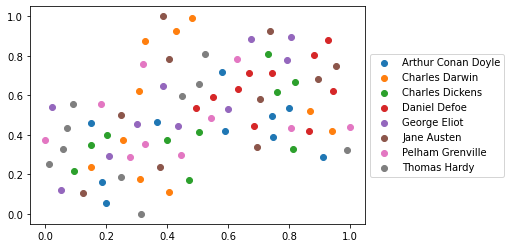

In [32]:
X = container_features[0]
visualize_tsne(X, labels)

# Normalize data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

# Classification

In [34]:
import classifierv2

In [35]:
iteration_score_container = [[] for _ in range(dimensions)]

In [36]:
for i in range(number_iterations):
    print('Init of iteration ' + str(i+1) + ' .......')
    limiar_scores = []
    for X in container_features:
        X = scaler.fit_transform(X)
        obj = classifierv2.Classification(X, y)
        scores = obj.classification()
        limiar_scores.append(scores)
    for index, score in enumerate(limiar_scores):
        iteration_score_container[index].append(score)
    print('End of iteration ' + str(i + 1) + ' .......')
    print('\n')

Init of iteration 1 .......
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 6 7 2 7 5 2 6 3 5 5 1 2 0 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 4 0 1 7 1 2 0 3 7 2 0 1 0 4]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 2 7 1 1 1 7 3 2 7 1 4 1 6 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 1 1 5 1 1 1 5 3 2 7 4 1 1 0 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 4 2 7 6 1 3 6 7 5 5 1 5 3 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 4 1 2 1 1 7 2 5 1 3 0 0 4 0 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 2 2 2 1 1 2 4 2 2 1 1 1 6 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 7 2 5 2 1 1 0 3 2 5 1 1 5 0 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 6 2 0 3 1 7 3 0 1 1 3 5 2 4 6]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 1 0 2 3 0 7 0 1 5 1 0 3 1 5]
Score 0.0
[5, 6, 0, 7, 4, 2,

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 6 2 3 3 0 2 4 3 5 6 3 3 1 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 1 2 1 1 7 0 4 5 5 4 1 2 2 7]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 7 4 1 4 6 2 2 2 2 1 2 1 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 5 3 5 4 4 4 0 2 0 5 3 4 0 1 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [0 5 6 6 0 3 7 0 6 2 7 1 3 3 3 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 5 2 1 1 1 7 2 1 1 7 1 1 1 1 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 6 7 7 1 4 2 2 2 2 2 1 2 1 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 3 7 7 4 7 6 2 2 0 3 4 6 1 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [0 7 5 6 1 5 0 3 6 4 5 1 7 7 1 3]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 5 7 1 1 7 0 6 1 2 1 1 2 1 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1]

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 4 5 7 2 7 1 0 6 6 1 5 0 4 3 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 0 1 1 1 7 2 0 3 7 0 7 3 1 0]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 2 6 7 2 1 4 2 3 2 7 1 4 2 2 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 5 3 5 2 1 1 0 0 5 0 4 1 5 2 7]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 2 6 3 6 4 4 6 2 7 5 1 2 3 1]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 3 4 1 1 1 7 2 6 2 2 1 7 2 1 1]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 7 1 1 4 2 2 2 2 2 1 2 1 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 2 3 5 1 1 1 0 2 2 0 3 1 2 2 5]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 6 6 4 7 0 1 1 3 6 3 5 1 1]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 4 6 2 1 1 7 5 1 1 5 4 1 1 1 2]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 6 7 2 7 5 2 6 3 5 5 1 2 0 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 4 0 1 7 1 2 0 3 7 2 0 1 0 4]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 2 7 1 1 1 7 3 2 7 1 4 1 6 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 1 1 5 1 1 1 5 3 2 7 4 1 1 0 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 4 2 7 6 1 3 6 7 5 5 1 5 3 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 4 1 2 1 1 7 2 5 1 3 0 0 4 0 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 2 2 2 1 1 2 4 2 2 1 1 1 6 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 7 2 5 2 1 1 0 3 2 5 1 1 5 0 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 6 2 0 3 1 7 3 0 1 1 3 5 2 4 6]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 7 1 0 2 3 0 7 0 1 5 1 0 3 1 5]
Score 0.0
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 2 7 1 2 0 2 6 2 1 2 1 2 1 7]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 3 7 1 0 7 0 6 0 5 3 4 0 1 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [3 6 6 3 6 6 0 0 4 7 2 1 6 7 6 7]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [1 6 6 5 1 5 0 2 5 7 2 6 1 6 1 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 7 1 2 4 2 6 2 2 2 1 1 1 7]
Score 0.1875
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 3 7 1 0 7 0 6 0 5 3 4 5 1 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 6 4 1 5 6 0 4 7 4 6 1 1 6 1 7]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 4 0 3 5 7 2 6 0 0 6 0 5 1 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 7 4 2 4 5 6 5 2 1 4 1 1 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 6 7 1 5 7 5 3 5 5 3 1 5 1 5]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1]

[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 6 4 1 0 6 3 6 5 7 7 4 2 6 6 6]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 5 1 7 1 1 0 0 5 2 7 0 6 1 6 2]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 3 7 1 1 1 2 2 2 2 1 1 2 1 2]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 3 7 1 1 1 0 3 0 0 4 4 2 1 5]
Score 0.125
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 1 1 0 7 2 4 1 6 1 6 1 6 7 2 6]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 1 0 7 1 7 2 5 1 2 1 1 1 1 6]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 2 7 4 1 4 2 6 2 6 2 1 2 1 1]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 1 3 7 7 0 7 0 6 0 0 3 4 0 2 5]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [4 6 4 1 7 2 1 2 5 2 2 4 3 2 3 5]
Score 0.25
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1] [7 7 6 0 0 1 0 2 5 2 2 6 1 1 1 6]
Score 0.0625
[5, 6, 0, 7, 4, 2, 6, 2, 3, 7, 1, 0, 3, 4, 5, 1]

# Save Results

In [37]:
def join_lists(l1):
    str_res = ''
    for x in l1:
        str_res+= str(x) + ' '
    return str_res

In [38]:
print('\nFinal results:', text_partition)
file_result = open(output_file, 'w')
all_score = []
for index, it_score in enumerate(iteration_score_container):
    it_score = np.array(it_score)
    it_score = np.mean(it_score, axis=0)
    it_score = [round(i,2) for i in it_score]
    all_score += it_score
    str_result = join_lists(it_score)
    file_result.write(str_result+"\n")
    print(str_result)
file_result.close()


Final results: 300
0.12 0.06 0.12 0.06 
0.06 0.19 0.06 0.06 
0.12 0.0 0.25 0.06 
0.12 0.06 0.12 0.06 
0.19 0.19 0.19 0.0 
0.12 0.12 0.12 0.0 
0.12 0.0 0.19 0.06 
0.19 0.12 0.12 0.0 
0.19 0.0 0.12 0.06 
0.06 0.06 0.12 0.06 
0.0 0.06 0.19 0.06 
0.06 0.0 0.19 0.19 
0.12 0.12 0.12 0.12 
0.06 0.06 0.25 0.06 
0.25 0.06 0.12 0.06 
0.19 0.19 0.25 0.06 
0.12 0.06 0.25 0.06 
0.12 0.25 0.19 0.06 
0.06 0.06 0.25 0.12 
0.31 0.06 0.25 0.06 
0.19 0.0 0.12 0.12 


In [39]:
max(all_score)

0.31